# Visuals of cycling routes

In [3]:
import osmnx as ox
from typing import Tuple, List, Iterable

In [25]:
G = ox.graph_from_place("Bratislava, Slovakia", network_type="drive")

In [22]:
def make_edges(
    G,
    route_streets:Iterable[str]=None,
    highlight:Tuple[str,float]=('red', 3),
    default:Tuple[str,float]=('gray', 0.5)) -> Tuple[List[str], List[float]]:
    highlight_edges = []
    for u, v, k, data in G.edges(keys=True, data=True):
        if "name" in data and data["name"] in route_streets:
            highlight_edges.append((u, v, k))
    edge_colors = []
    edge_widths = []
    hc, hw = highlight
    dc, dw = default
    for u, v, k in G.edges(keys=True):
        if (u, v, k) in highlight_edges:
            edge_colors.append(hc)
            edge_widths.append(hw)
        else:
            edge_colors.append(dc)
            edge_widths.append(dw)
    return edge_colors, edge_widths

In [23]:
def plot_graph(graph, edges:Tuple[List[str], List[float]]):
    fig, ax = ox.plot_graph(
    graph,
    node_size=5,
    edge_color=edges[0],
    edge_linewidth=edges[1],
    bgcolor='white'
    )
    return fig, ax


# **Dunajská**

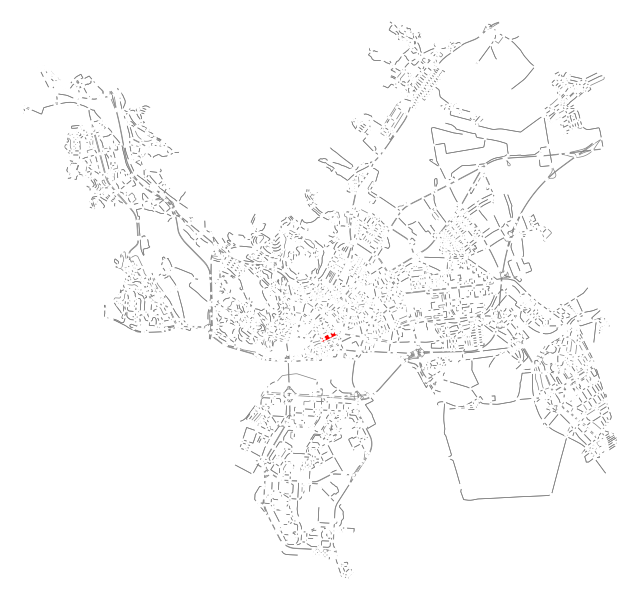

In [5]:
route_streets = ["Dunajská"]
edges = make_edges(G, route_streets)
fig, ax = plot_graph(G, edges)

# **Vajanského nábrežie**

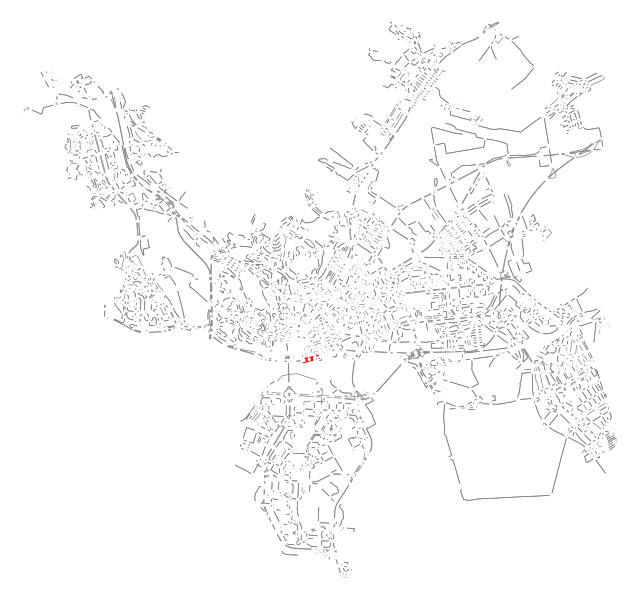

In [6]:
route_streets = ["Vajanského nábrežie"]
edges = make_edges(G, route_streets)
fig, ax = plot_graph(G, edges)

# **River park**

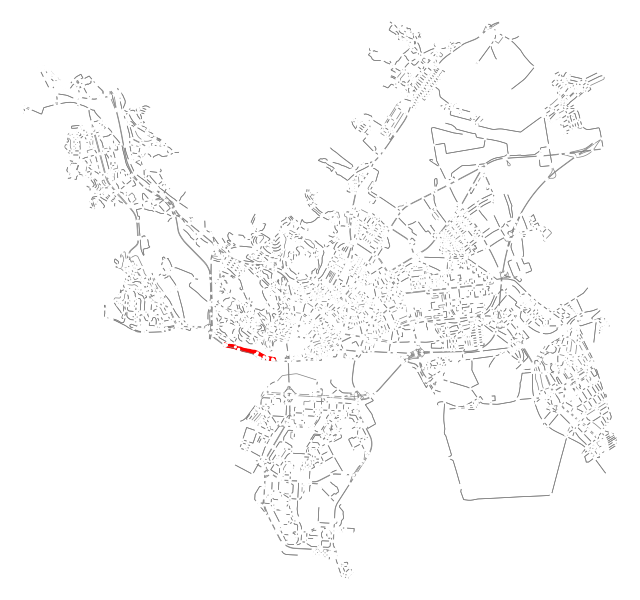

In [7]:
route_streets = ["Žižkova"]
edges = make_edges(G, route_streets)
fig, ax = plot_graph(G, edges)

# **Železná studnička**

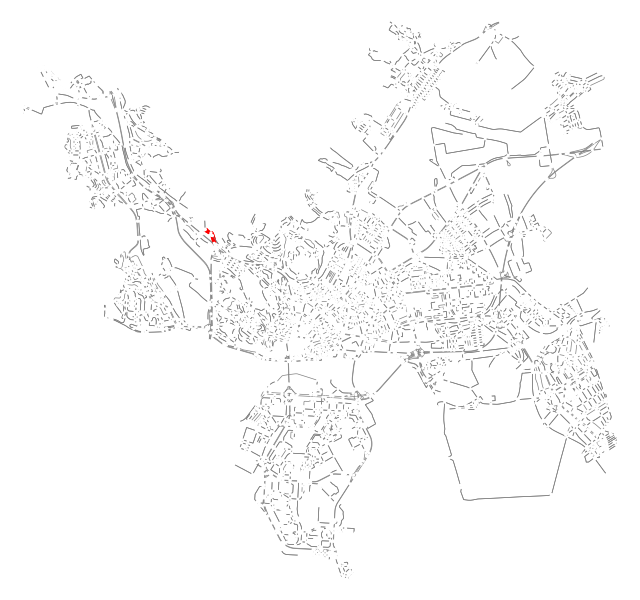

In [8]:
route_streets = ["K Železnej studienke"]
edges = make_edges(G, route_streets)
fig, ax = plot_graph(G, edges)

# **Einsteinova**

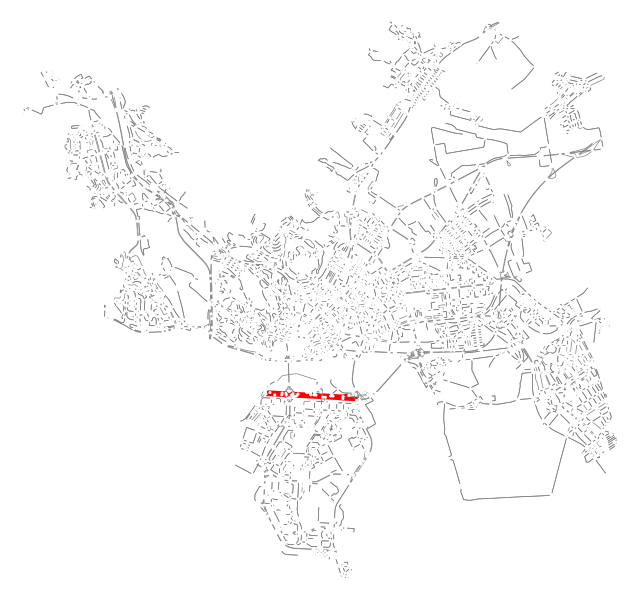

In [9]:
route_streets = ["Einsteinova"]
edges = make_edges(G, route_streets)
fig, ax = plot_graph(G, edges)

# **Páričkova**

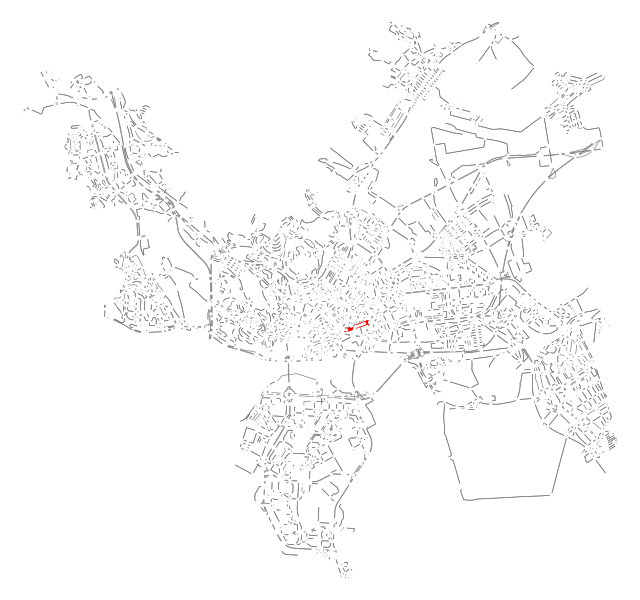

In [27]:
route_streets = ["Páričkova"]
edges = make_edges(G, route_streets)
fig, ax = plot_graph(G, edges)

# **Viedenská**

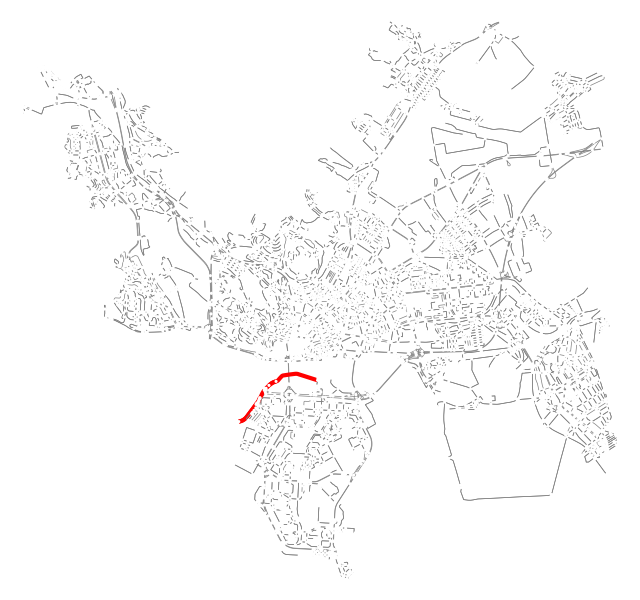

In [29]:
route_streets = ["Viedenská cesta"]
edges = make_edges(G, route_streets)
fig, ax = plot_graph(G, edges)

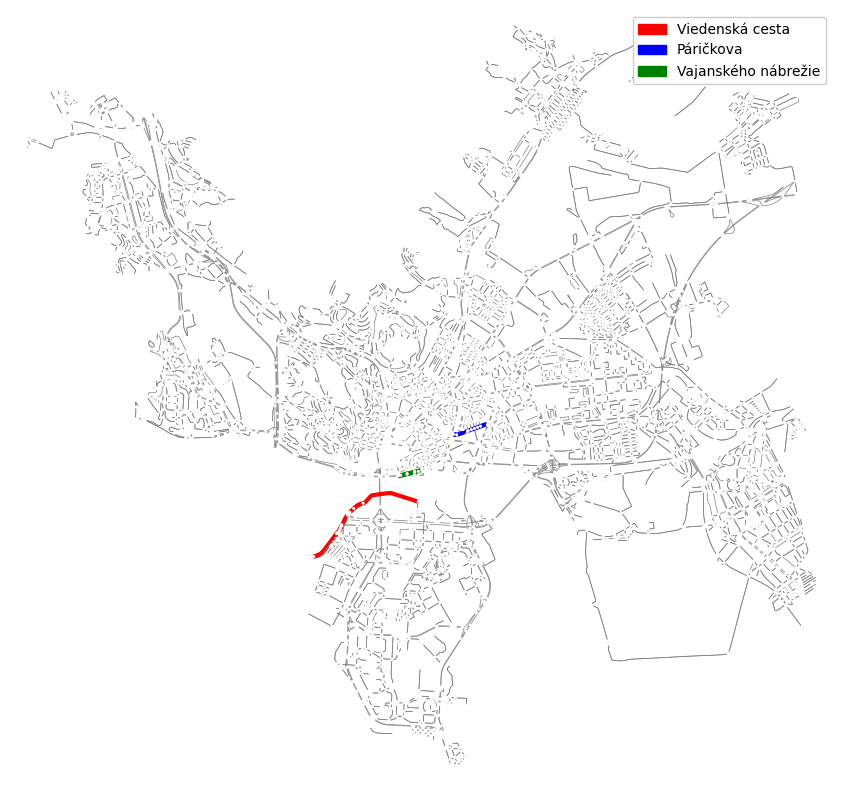

In [ ]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

route_streets = ["Viedenská cesta", "Páričkova", "Vajanského nábrežie"]
colors = {'Viedenská cesta': 'red', 'Páričkova': 'blue', 'Vajanského nábrežie': 'green'}

highlight_edges = []
for u, v, k, data in G.edges(keys=True, data=True):
    if "name" in data and data["name"] in route_streets:
        highlight_edges.append((u, v, k, data["name"]))

edge_colors = []
edge_widths = []
for u, v, k in G.edges(keys=True):
    found = False
    for he_u, he_v, he_k, street_name in highlight_edges:
        if (u, v, k) == (he_u, he_v, he_k):
            edge_colors.append(colors[street_name])
            edge_widths.append(3)
            found = True
            break
    if not found:
        edge_colors.append('gray')
        edge_widths.append(0.5)

fig, ax = plt.subplots(figsize=(10, 8))

fig, ax = ox.plot_graph(
    G,
    node_size=5,
    edge_color=edge_colors,
    edge_linewidth=edge_widths,
    bgcolor='white',
    ax=ax,
    show=False,
    close=False
)

# Add legend with better visibility
patches = [mpatches.Patch(color=color, label=street) for street, color in colors.items()]
ax.legend(handles=patches, loc='upper right', fontsize=10, framealpha=0.98)
plt.tight_layout()
plt.show()